In [4]:
# import libraries
from sklearn.tree import plot_tree
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc


In [5]:
# load data
df = pd.read_csv("datasets/data.csv")

In [6]:
# EDA
print("Dataset Shape:", df.shape)
print("\nMissing Values:\n", df.isnull().sum())
print("\nClass Distribution:\n", df["Bankrupt?"].value_counts())
print(
    "\nClass Distribution Percentage:\n", df["Bankrupt?"].value_counts(normalize=True)
)

Dataset Shape: (6819, 96)

Missing Values:
 Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
                                                           ..
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Net Income Flag                                            0
 Equity to Liability                                        0
Length: 96, dtype: int64

Class Distribution:
 Bankrupt?
0    6599
1     220
Name: count, dtype: int64

Class Distribution Percentage:
 Bankrupt?
0    0.967737
1    0.032263
Name: proportion, dtype: float64


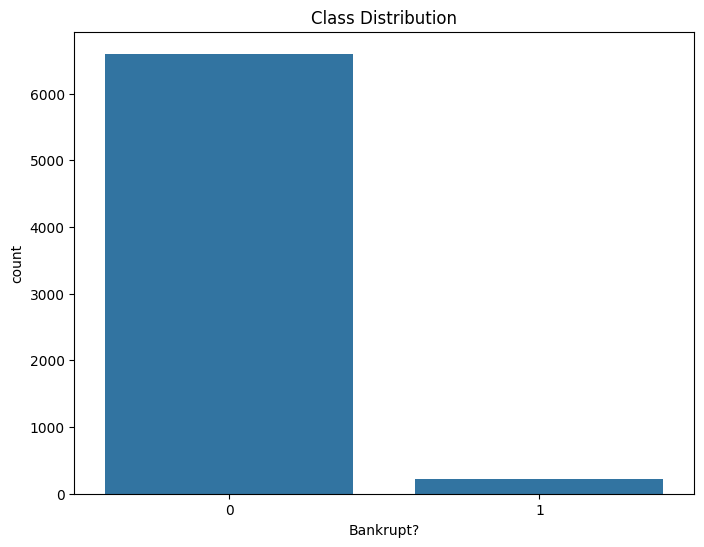

In [7]:
# visualizing of the class distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x="Bankrupt?")
plt.title("Class Distribution")
plt.show()

In [8]:
# split features and labels
X = df.drop("Bankrupt?", axis=1)
y = df["Bankrupt?"]

In [9]:
# splitting the test data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [10]:
# train multiple models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
}


Training Logistic Regression...


/Users/supimraid/Desktop/MY-DAC-Curriculum/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/supimraid/Desktop/MY-DAC-Curriculum/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-lear

Cross-validation scores: [0.9624198  0.96791934 0.96883593 0.9624198  0.96516957]
Average CV score: 0.965 (+/- 0.005)

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1313
           1       0.00      0.00      0.00        51

    accuracy                           0.96      1364
   macro avg       0.48      0.50      0.49      1364
weighted avg       0.93      0.96      0.94      1364


Training Decision Tree...
Cross-validation scores: [0.95600367 0.96150321 0.95142071 0.95967003 0.95783685]
Average CV score: 0.957 (+/- 0.007)

Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1313
           1       0.36      0.33      0.35        51

    accuracy                           0.95      1364
   macro avg       0.67      0.66      0.66      1364
weighted avg       0.95      0.95      0.95     

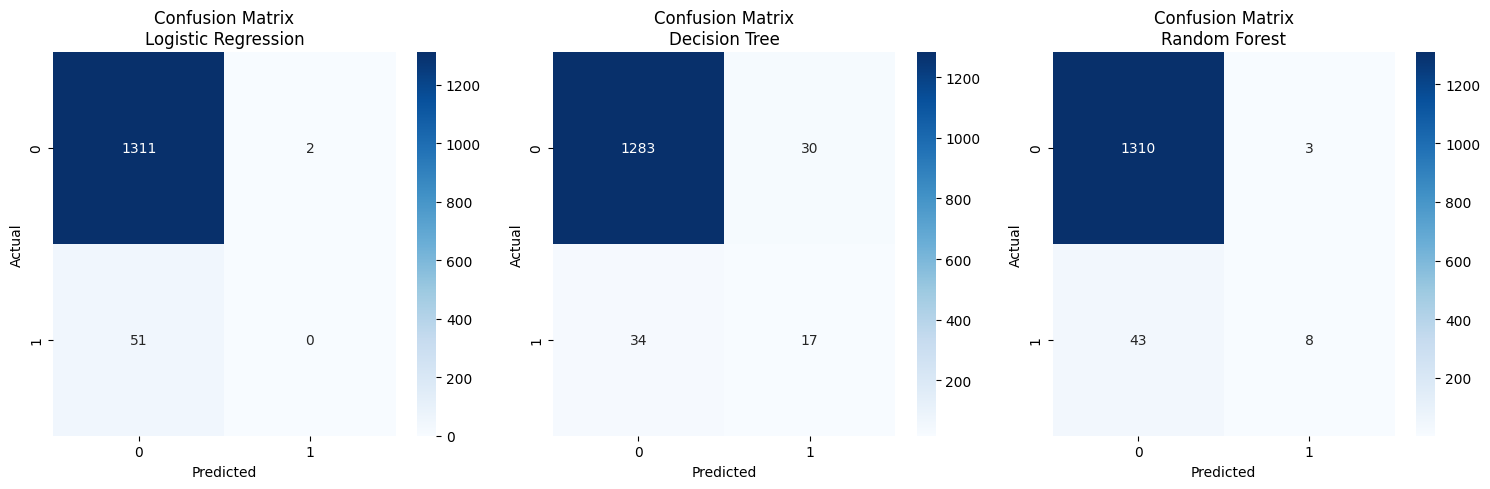

In [11]:

results = {}
plt.figure(figsize=(20, 5))
for i, (name, model) in enumerate(models.items(), 1):
    print(f"\nTraining {name}...")

    # cross-validate
    cv_scores = cross_val_score(model, X_train, y_train, cv=5)
    print(f"Cross-validation scores: {cv_scores}")
    print(f"Average CV score: {cv_scores.mean():.3f} (+/- {cv_scores.std() * 2:.3f})")

    # train model
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"\nClassification Report for {name}:")
    print(classification_report(y_test, y_pred))

    # plotting the confusion matrix
    plt.subplot(1, 4, i)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix\n{name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")

    results[name] = model.score(X_test, y_test)

plt.tight_layout()
plt.show()

In [12]:
# feature importance from decision tree (choose decision tree as the best model)
dt_model = models["Decision Tree"]
feature_importance = pd.DataFrame(
    {"feature": X.columns, "importance": dt_model.feature_importances_}
).sort_values("importance", ascending=False)

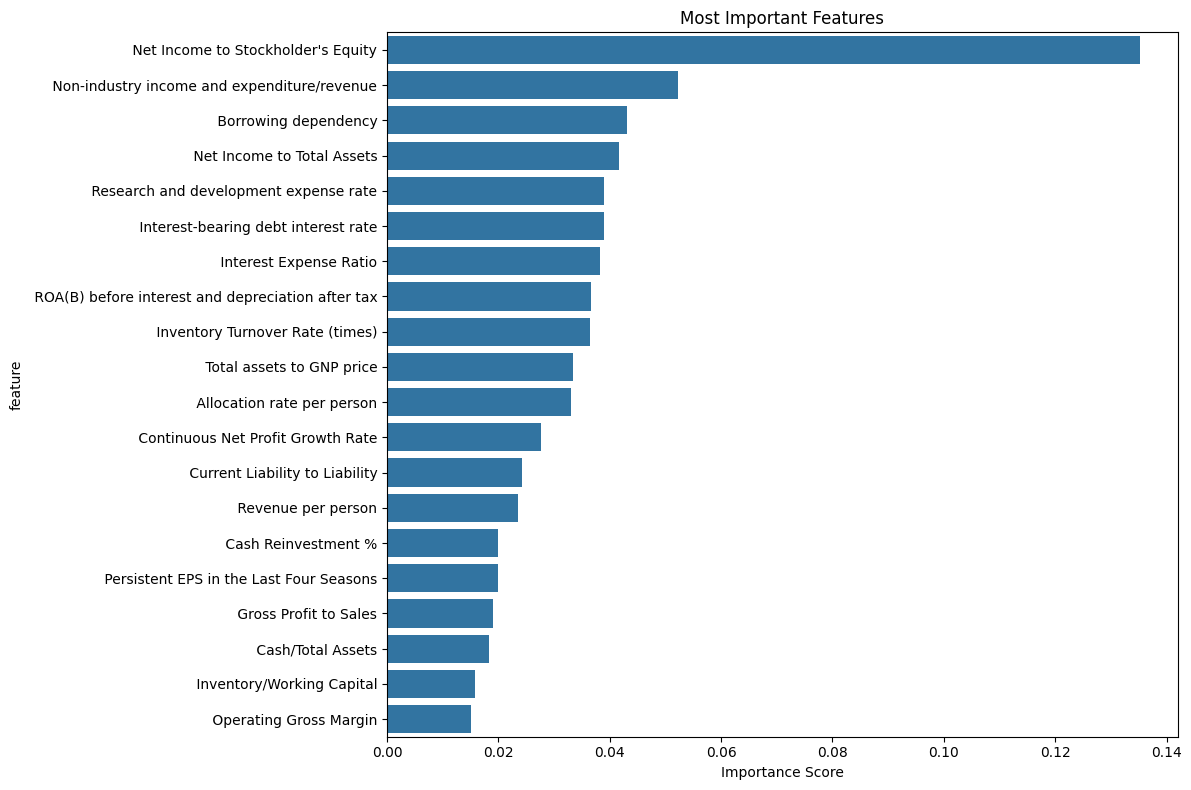

In [19]:
# visualizing the data
plt.figure(figsize=(12, 8))
sns.barplot(data=feature_importance.head(20), x="importance", y="feature")
plt.title("Most Important Features")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()

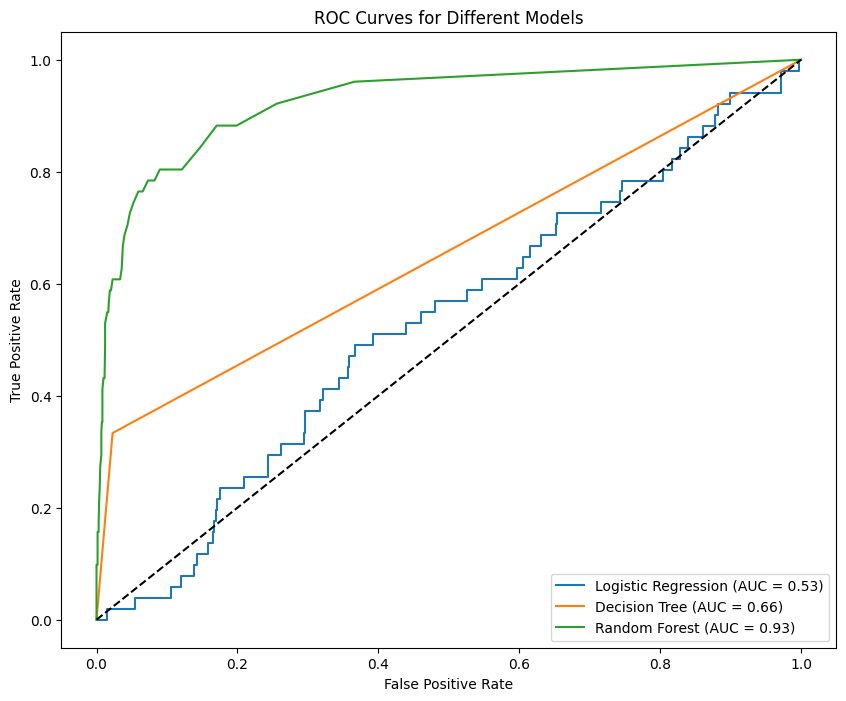

In [14]:
# ROC curve plotting
plt.figure(figsize=(10, 8))
for name, model in models.items():
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for Different Models")
plt.legend()
plt.show()

In [15]:
# comparing decision tree and random forest accuracy
dt_pred = models["Decision Tree"].predict(X_test)
rf_pred = models["Random Forest"].predict(X_test)

dt_report = classification_report(y_test, dt_pred, output_dict=True)
rf_report = classification_report(y_test, rf_pred, output_dict=True)

dt_class1_f1 = dt_report["1"]["f1-score"]
rf_class1_f1 = rf_report["1"]["f1-score"]

print(f"\nClass 1 F1-Score comparison:")
print(f"Decision Tree: {dt_class1_f1:.3f}")
print(f"Random Forest: {rf_class1_f1:.3f}")

# Choose the better model for hyperparameter tuning (not sure i use AI)
if dt_class1_f1 > rf_class1_f1:
    best_model_name = "Decision Tree"
    model_for_tuning = DecisionTreeClassifier(random_state=42)
    param_grid = {
        "min_samples_split": [2, 5, 10, 20, 30],  # Increased min samples to split
        "min_samples_leaf": [1, 5, 10, 15, 20],  # Increased min samples per leaf
        "criterion": ["gini", "entropy"],  # Gini impurity or information gain
        "ccp_alpha": [0.0, 0.001, 0.01, 0.1],  # Added cost-complexity pruning parameter
        "max_features": ["sqrt", "log2", None],  # Number of features to consider
        "max_depth": [None, 5, 10, 15, 20],  # Maximum depth of tree
        "min_impurity_decrease": [0.0, 0.01, 0.05]  # Minimum impurity decrease for split
    }
else:
    best_model_name = "Random Forest"
    model_for_tuning = RandomForestClassifier(random_state=42)
    param_grid = {
        "min_samples_split": [2, 5, 10, 20, 30],  # Increased min samples to split
        "min_samples_leaf": [1, 5, 10, 15, 20],  # Increased min samples per leaf
        "criterion": ["gini", "entropy"],  # Gini impurity or information gain
        "ccp_alpha": [0.0, 0.001, 0.01, 0.1],  # Added cost-complexity pruning parameter
        "max_features": ["sqrt", "log2", None],  # Number of features to consider
        "max_depth": [None, 5, 10, 15, 20],  # Maximum depth of tree
        "min_impurity_decrease": [0.0, 0.01, 0.05],  # Minimum impurity decrease for split
    }

print(f"\nProceeding with hyperparameter tuning for {best_model_name}")

grid_search = GridSearchCV(model_for_tuning, param_grid, cv=5, scoring="f1", n_jobs=-1)

grid_search.fit(X_train, y_train)

print("\nBest parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)


Class 1 F1-Score comparison:
Decision Tree: 0.347
Random Forest: 0.258

Proceeding with hyperparameter tuning for Decision Tree

Best parameters: {'ccp_alpha': 0.001, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 5}
Best cross-validation score: 0.39205939017777824



Final Model Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1313
           1       0.52      0.24      0.32        51

    accuracy                           0.96      1364
   macro avg       0.75      0.61      0.65      1364
weighted avg       0.95      0.96      0.96      1364



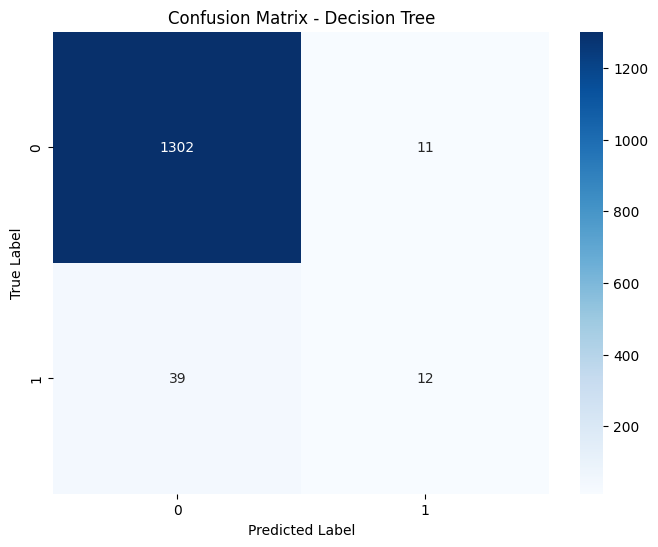


Key Findings:
1. Best performing model: Random Forest

2. Top 10 most important features:
                                               feature  importance
89                  Net Income to Stockholder's Equity    0.135239
8          Non-industry income and expenditure/revenue    0.052249
39                                Borrowing dependency    0.043145
85                          Net Income to Total Assets    0.041574
11               Research and development expense rate    0.039053
13                 Interest-bearing debt interest rate    0.038886
34                              Interest Expense Ratio    0.038178
2    ROA(B) before interest and depreciation after tax    0.036695
47                     Inventory Turnover Rate (times)    0.036413
86                           Total assets to GNP price    0.033354

3. Model comparison:
Logistic Regression: 0.961
Decision Tree: 0.953
Random Forest: 0.966

4. Decision Tree Visualization:


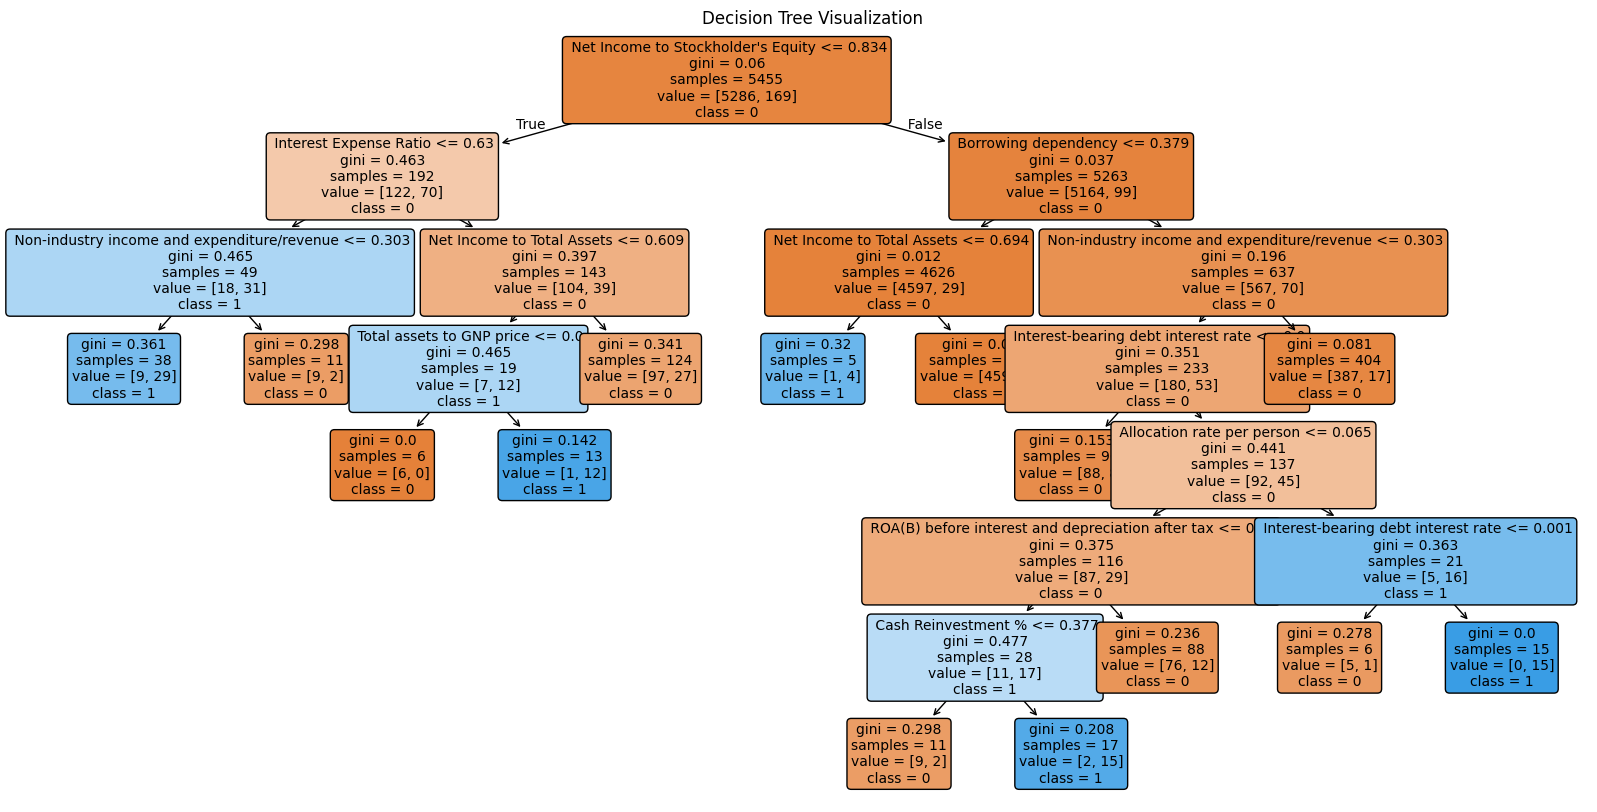

In [16]:
# final model evaluation with best parameters
best_model = grid_search.best_estimator_
y_pred_final = best_model.predict(X_test)
print("\nFinal Model Classification Report:")
print(classification_report(y_test, y_pred_final))

# plot confusion matrix
cm = confusion_matrix(y_test, y_pred_final)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title(f"Confusion Matrix - {best_model_name}")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

print("\nKey Findings:")
print("1. Best performing model:", max(results, key=results.get))
print("\n2. Top 10 most important features:")
print(feature_importance.head(10).to_string())
print("\n3. Model comparison:")
for model, score in results.items():
    print(f"{model}: {score:.3f}")
print("\n4. Decision Tree Visualization:")
plt.figure(figsize=(20, 10))
plot_tree(
    best_model,
    feature_names=X.columns,
    class_names=["0", "1"],
    filled=True,
    rounded=True,
    fontsize=10,
)
plt.title("Decision Tree Visualization")
plt.show()


Testing with 50% reduction of majority class...

Testing with 55% reduction of majority class...

Testing with 60% reduction of majority class...

Testing with 65% reduction of majority class...

Testing with 70% reduction of majority class...

Testing with 75% reduction of majority class...

Testing with 80% reduction of majority class...

Testing with 85% reduction of majority class...

Testing with 90% reduction of majority class...

Testing with 95% reduction of majority class...


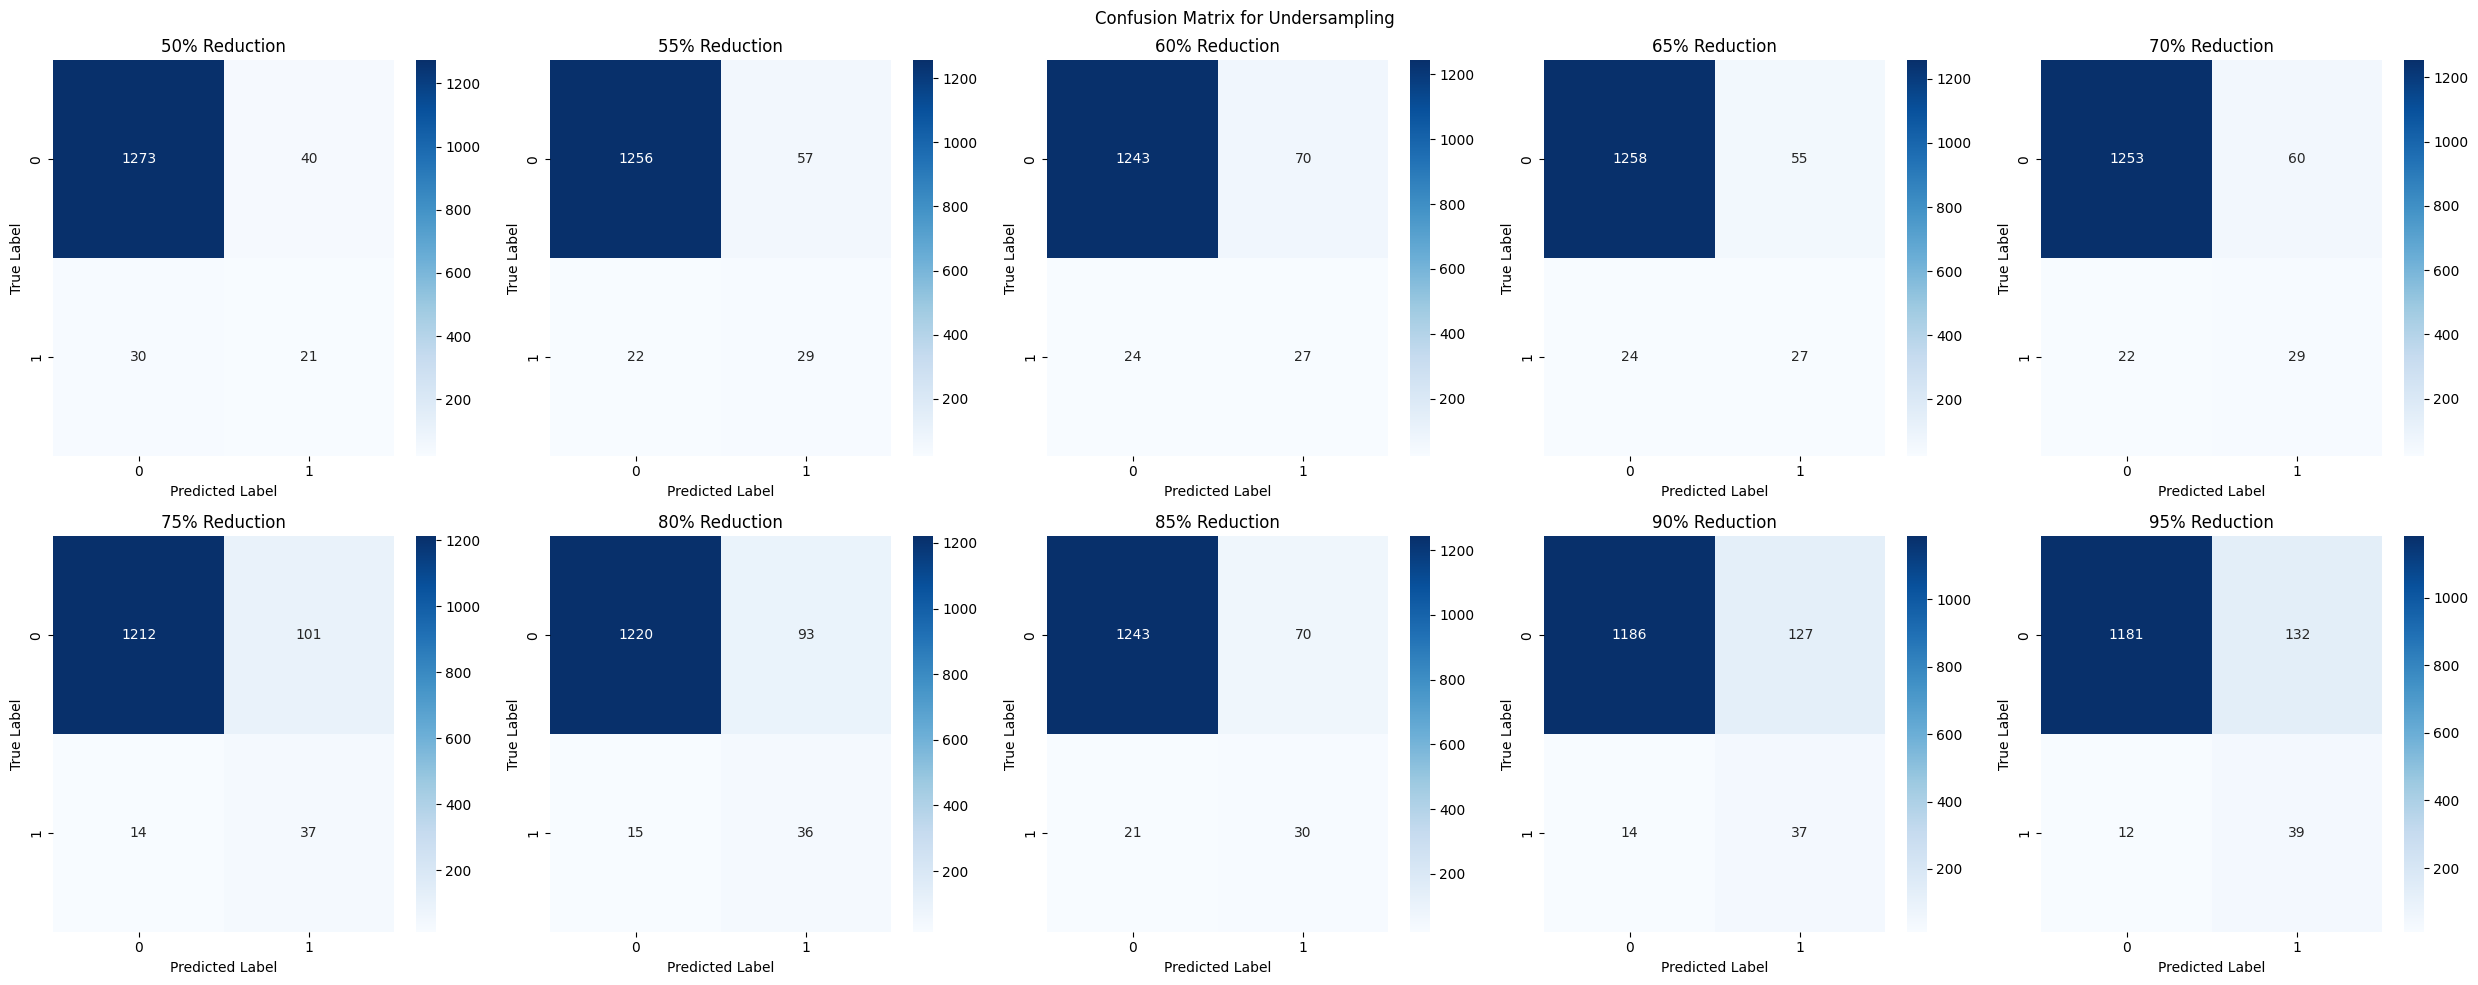

In [17]:
# undersampling the data to try to get higher accuracy
undersampling_percentages = [0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95]  # using 85% reduction as in the reference code
undersampling_results = {}

fig, axes = plt.subplots(2, len(undersampling_percentages)//2, figsize=(25, 10))
fig.suptitle("Confusion Matrix for Undersampling")
axes = axes.ravel() # flatten axes array to make indexing easier (?)

for i, percentage in enumerate(undersampling_percentages):
    print(f"\nTesting with {int(percentage*100)}% reduction of majority class...")

    # drop samples from majority class
    class_0_indices = y_train[y_train == 0].index
    drop_indices = np.random.choice(class_0_indices, size=int(len(class_0_indices) * percentage), replace=False)
    X_train_under = X_train.drop(drop_indices)
    y_train_under = y_train.drop(drop_indices)

    # scale features
    scaler = StandardScaler()
    X_train_under = scaler.fit_transform(X_train_under)
    X_test_scaled = scaler.transform(X_test)

    # perform GridSearch
    grid_search_under = GridSearchCV(
        model_for_tuning, param_grid, cv=5, scoring="f1", n_jobs=-1
    )
    grid_search_under.fit(X_train_under, y_train_under)

    # best model and features
    best_model_under = grid_search_under.best_estimator_
    y_pred_under = best_model_under.predict(X_test_scaled)

    # store results
    undersampling_results[percentage] = {
        "best_params": grid_search_under.best_params_,
        "best_score": grid_search_under.best_score_,
        "test_report": classification_report(y_test, y_pred_under, output_dict=True),
    }

    # plot confusion matrix
    cm = confusion_matrix(y_test, y_pred_under)
    sns.heatmap(
        cm, annot=True, fmt="d", cmap="Blues", ax=axes[i]
    )
    axes[i].set_title(f"{int(percentage*100)}% Reduction")
    axes[i].set_ylabel("True Label")
    axes[i].set_xlabel("Predicted Label")

plt.tight_layout()
plt.show()

# this took excruciatingly long
# confusion matrix but i am confused
# asked my friend for help

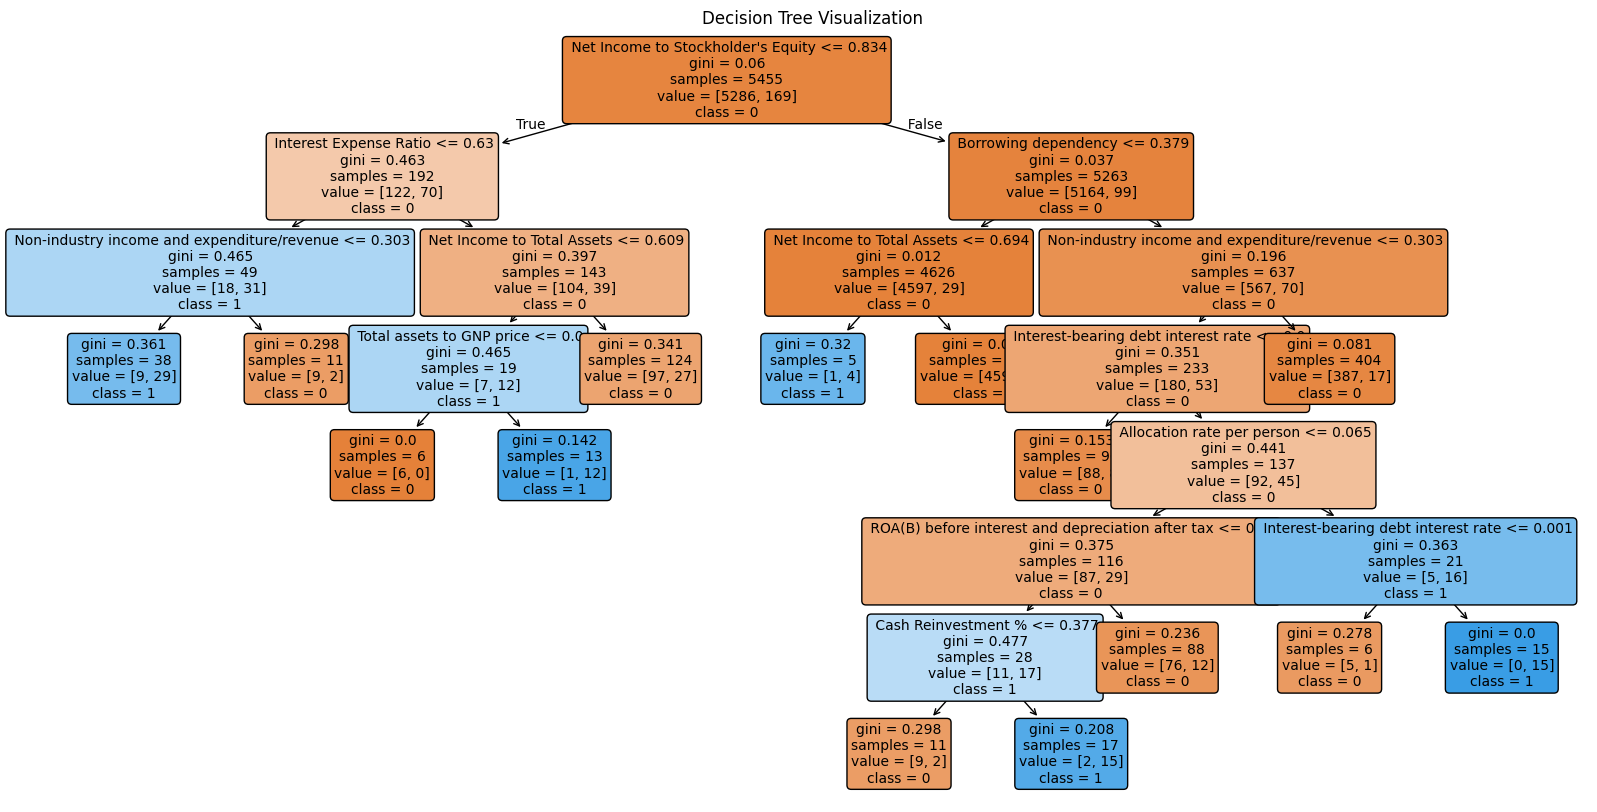

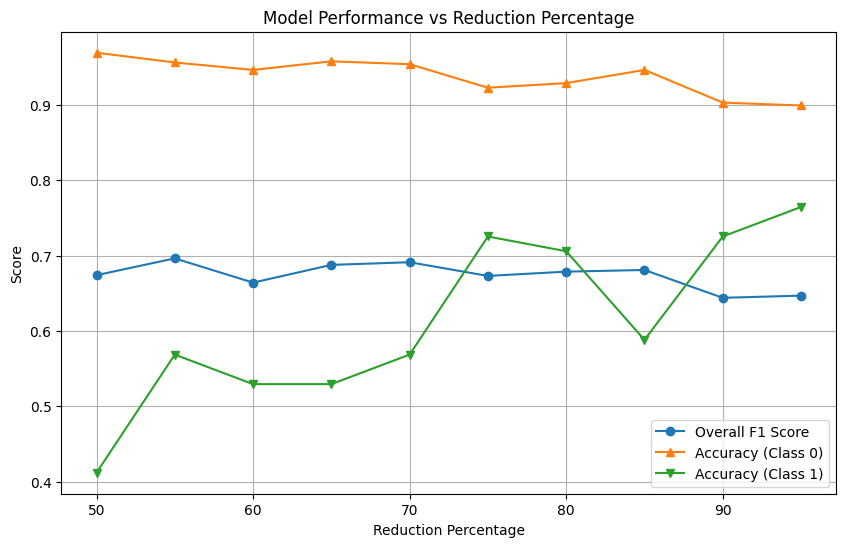


Undersampling Experiments Summary:

50.0% Reduction:
Best CV Score: 0.475
Test F1 Score (Class 1): 0.375
Class 0 Accuracy: 0.970
Class 1 Accuracy: 0.412

55.00000000000001% Reduction:
Best CV Score: 0.475
Test F1 Score (Class 1): 0.423
Class 0 Accuracy: 0.957
Class 1 Accuracy: 0.569

60.0% Reduction:
Best CV Score: 0.540
Test F1 Score (Class 1): 0.365
Class 0 Accuracy: 0.947
Class 1 Accuracy: 0.529

65.0% Reduction:
Best CV Score: 0.580
Test F1 Score (Class 1): 0.406
Class 0 Accuracy: 0.958
Class 1 Accuracy: 0.529

70.0% Reduction:
Best CV Score: 0.589
Test F1 Score (Class 1): 0.414
Class 0 Accuracy: 0.954
Class 1 Accuracy: 0.569

75.0% Reduction:
Best CV Score: 0.640
Test F1 Score (Class 1): 0.392
Class 0 Accuracy: 0.923
Class 1 Accuracy: 0.725

80.0% Reduction:
Best CV Score: 0.646
Test F1 Score (Class 1): 0.400
Class 0 Accuracy: 0.929
Class 1 Accuracy: 0.706

85.0% Reduction:
Best CV Score: 0.708
Test F1 Score (Class 1): 0.397
Class 0 Accuracy: 0.947
Class 1 Accuracy: 0.588

90.0% 

In [18]:
plt.figure(figsize=(20, 10))
plot_tree(
    best_model,
    feature_names=X.columns,
    class_names=["0", "1"],
    filled=True,
    rounded=True,
    fontsize=10,
)
plt.title("Decision Tree Visualization")
plt.show()

percentages = [p * 100 for p in undersampling_percentages]
f1_scores = [
    results["test_report"]["macro avg"]["f1-score"]
    for results in undersampling_results.values()
]
class0_acc = [
    results["test_report"]["0"]["recall"] for results in undersampling_results.values()
]
class1_acc = [
    results["test_report"]["1"]["recall"] for results in undersampling_results.values()
]

plt.figure(figsize=(10, 6))
plt.plot(percentages, f1_scores, marker="o", label="Overall F1 Score")
plt.plot(percentages, class0_acc, marker="^", label="Accuracy (Class 0)")
plt.plot(percentages, class1_acc, marker="v", label="Accuracy (Class 1)")
plt.xlabel("Reduction Percentage")
plt.ylabel("Score")
plt.title("Model Performance vs Reduction Percentage")
plt.legend()
plt.grid(True)
plt.show()

print("\nUndersampling Experiments Summary:")
for percentage, results in undersampling_results.items():
    print(f"\n{percentage*100}% Reduction:")
    print(f"Best CV Score: {results['best_score']:.3f}")
    print(f"Test F1 Score (Class 1): {results['test_report']['1']['f1-score']:.3f}")
    print(f"Class 0 Accuracy: {results['test_report']['0']['recall']:.3f}")
    print(f"Class 1 Accuracy: {results['test_report']['1']['recall']:.3f}")

#from results i choose decision tree with 85% data reduction